# 🎮 EDA Project – Video Game Sales
**Name:** Ahmad habrat

**ID:** 211926779 

**Project Number:** 28  

This notebook explores video game sales data using Python, as part of the EDA course project.

https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting setup
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
file_path = 'trimmed_video_games_sales_.csv'
df = pd.read_csv(file_path)
df.columns = ['rank', 'name', 'platform', 'year', 'genre', 'publisher',
              'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
df.head(20)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 1. Wrangling Data

In [7]:
df.dtypes

rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

#### 1.2 Missing values

In [111]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


year            4
publisher       1
rank            0
name            0
platform        0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

array([[<Axes: title={'center': 'global_sales'}>]], dtype=object)

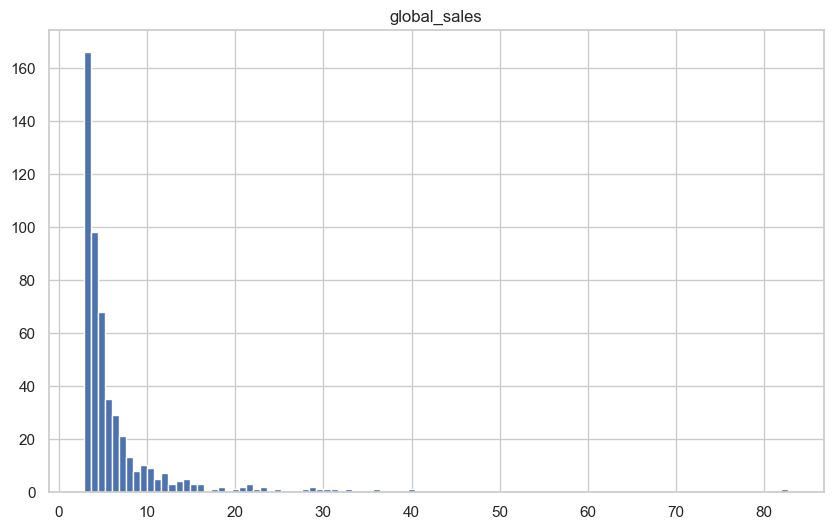

In [110]:
df.hist('global_sales',bins=100)

<Axes: >

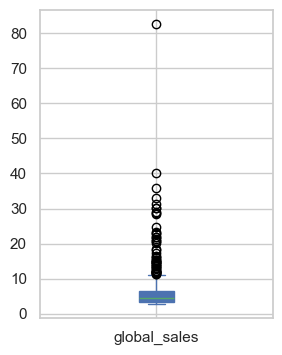

In [104]:
df['global_sales'].plot(kind='box', figsize=(3,4), patch_artist=True)

**Most games sold modestly, but a few titles became massive outliers with extremely high global sales.**

#### 1.3 Noisy data - outliers

**Plot only numeric columns, that are not binary or an ID:**

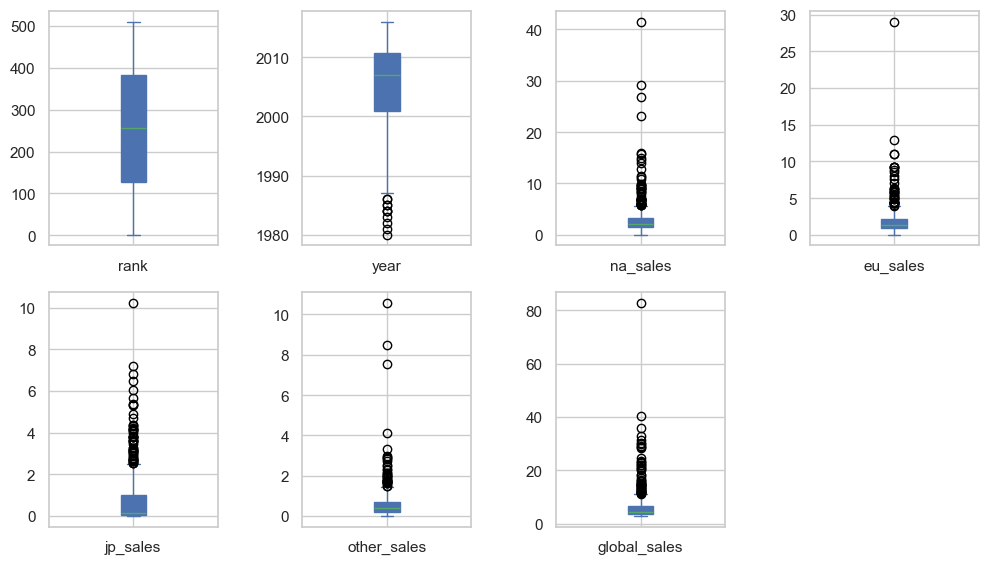

In [14]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

**Most games had low sales, but a few standout titles reached exceptionally high sales.**


In [15]:
df[df['year'] < 1990]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
155,156,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58
170,171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34


In [117]:
df = df[df['year'] > 1900].reset_index(drop=True)

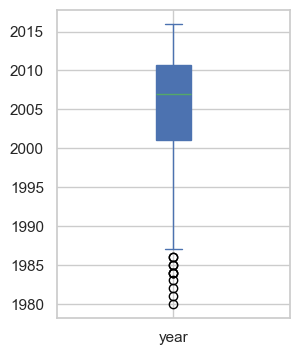

In [118]:
plt.figure(figsize=(3,4))
df['year'].plot(kind='box', patch_artist=True);

**Most games in the dataset were released between 2000 and 2010, while the small circles below the box represent outlier games released much earlier, mainly in the 1980s.**

#### 1.4 Transformations

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          510 non-null    int64  
 1   name          510 non-null    object 
 2   platform      510 non-null    object 
 3   year          506 non-null    float64
 4   genre         510 non-null    object 
 5   publisher     509 non-null    object 
 6   na_sales      510 non-null    float64
 7   eu_sales      510 non-null    float64
 8   jp_sales      510 non-null    float64
 9   other_sales   510 non-null    float64
 10  global_sales  510 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 44.0+ KB


## 2. Understand the Data – Visual Exploration ,Correlations - patterns in the data

In [128]:
df[['rank', 'year', 'global_sales', 'na_sales', 'eu_sales', 'jp_sales','other_sales']].head(10)

,rank,year,global_sales,na_sales,eu_sales,jp_sales,other_sales
0,1,2006.0,82.74,41.49,29.02,3.77,8.46
1,2,1985.0,40.24,29.08,3.58,6.81,0.77
2,3,2008.0,35.82,15.85,12.88,3.79,3.31
3,4,2009.0,33.00,15.75,11.01,3.28,2.96
4,5,1996.0,31.37,11.27,8.89,10.22,1.00
5,6,1989.0,30.26,23.20,2.26,4.22,0.58
6,7,2006.0,30.01,11.38,9.23,6.50,2.90
7,8,2006.0,29.02,14.03,9.20,2.93,2.85
8,9,2009.0,28.62,14.59,7.06,4.70,2.26
9,10,1984.0,28.31,26.93,0.63,0.28,0.47


,Total Sales (Millions),% of Global Sales
North America,1523.60,47.540743
Europe,967.26,30.181320
Japan,411.56,12.841867
Other,302.45,9.437318


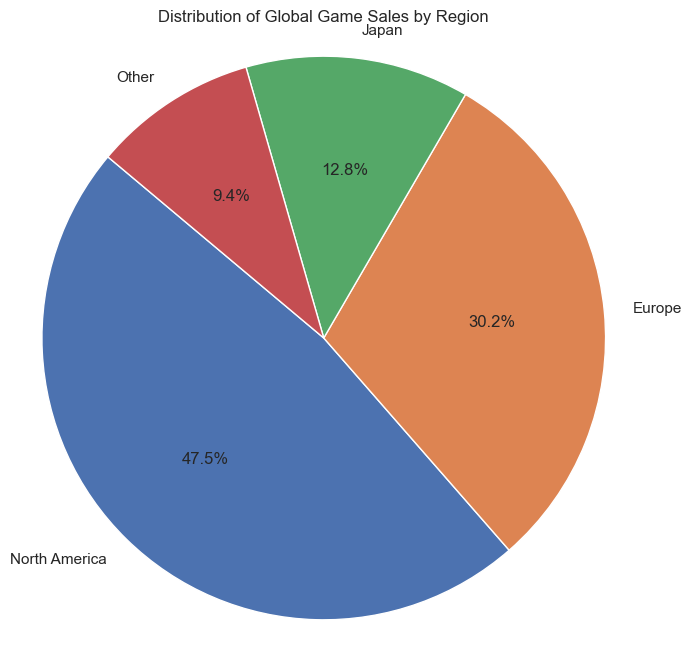

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# קריאת הקובץ (אם לא נטען עדיין)
df = pd.read_csv("trimmed_video_games_sales_.csv")

# תיקון שמות עמודות אם צריך
df.columns = ['rank', 'name', 'platform', 'year', 'genre', 'publisher',
              'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']

# חישוב סכום מכירות לפי אזור
regional_sales = pd.DataFrame({
    'North America': df['na_sales'].sum(),
    'Europe': df['eu_sales'].sum(),
    'Japan': df['jp_sales'].sum(),
    'Other': df['other_sales'].sum()
}, index=['Total Sales (Millions)']).T

# חישוב אחוז מהמכירות הגלובליות
regional_sales['% of Global Sales'] = (regional_sales['Total Sales (Millions)'] / df['global_sales'].sum()) * 100

# מיון מהגבוה לנמוך
regional_sales = regional_sales.sort_values(by='Total Sales (Millions)', ascending=False)

# הצגת טבלה
display(regional_sales)

# גרף עוגה
plt.figure(figsize=(8, 8))
plt.pie(regional_sales['Total Sales (Millions)'], 
        labels=regional_sales.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Distribution of Global Game Sales by Region')
plt.axis('equal')
plt.show()


**הגרף מראה באופן ויזואלי ברור כמה שוק המשחקים תלוי בצפון אמריקה.**

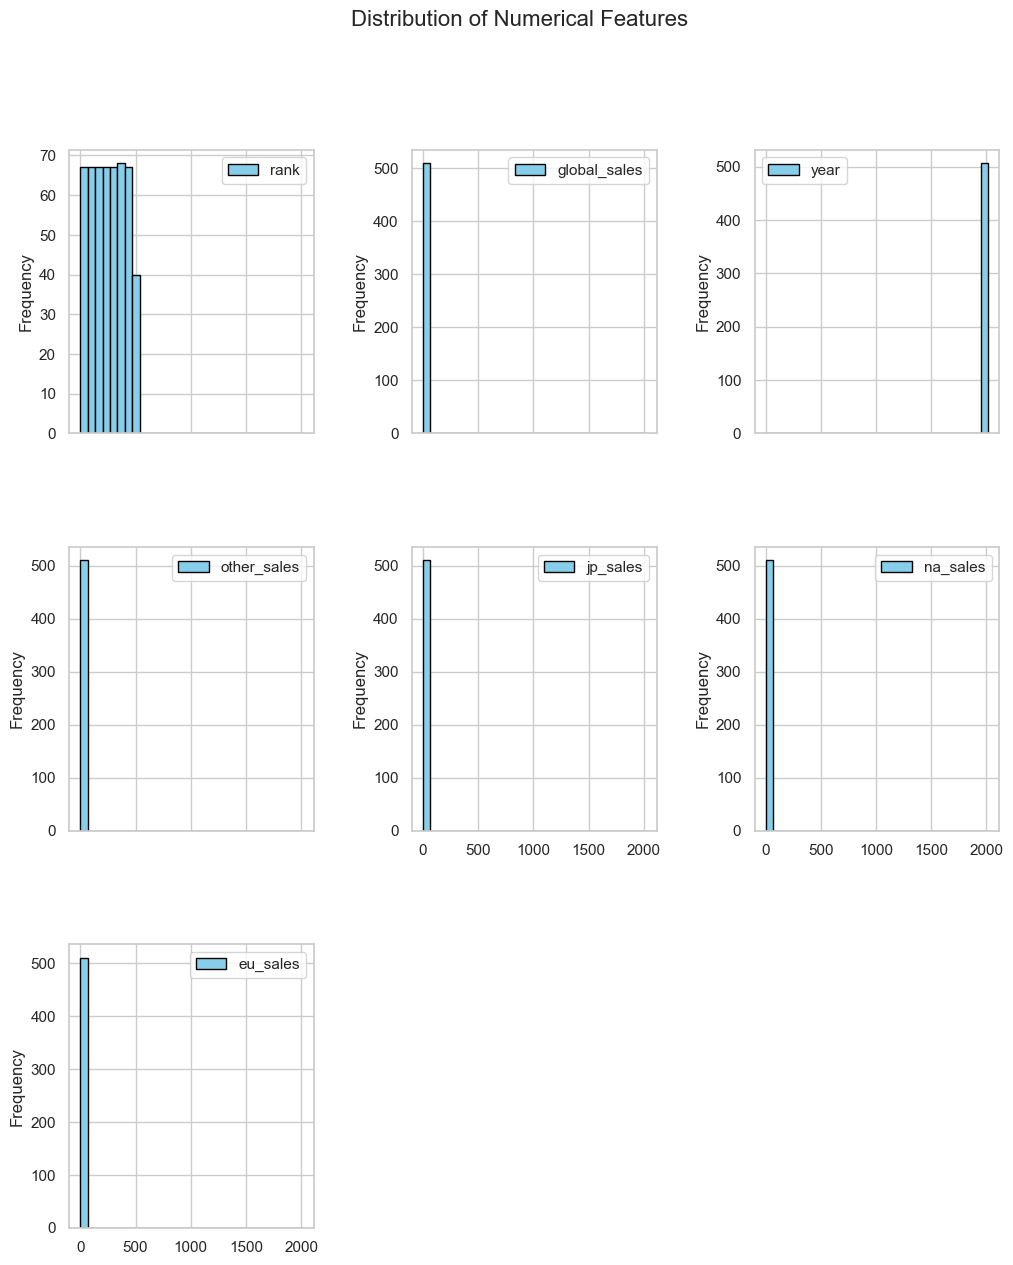

In [81]:

features = ['rank', 'global_sales', 'year', 'other_sales', 'jp_sales', 'na_sales', 'eu_sales']
df[features].plot(subplots=True, layout=(3, 3), kind='hist', figsize=(12, 14), bins=30, color='skyblue', edgecolor='black')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


Most features, especially sales-related ones like global_sales, na_sales, and jp_sales, are heavily skewed to the left, meaning most games had low sales, while a small number had very high sales.

**הגרפים מציגים את ההתפלגות של מספר עמודות מספריות עיקריות בדאטה: דירוג, מכירות לפי אזור, ושנת יציאה.
זה מעיד על פיזור לא אחיד ודומיננטיות של משחקים בודדים עם מכירות גבוהות במיוחד.**

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

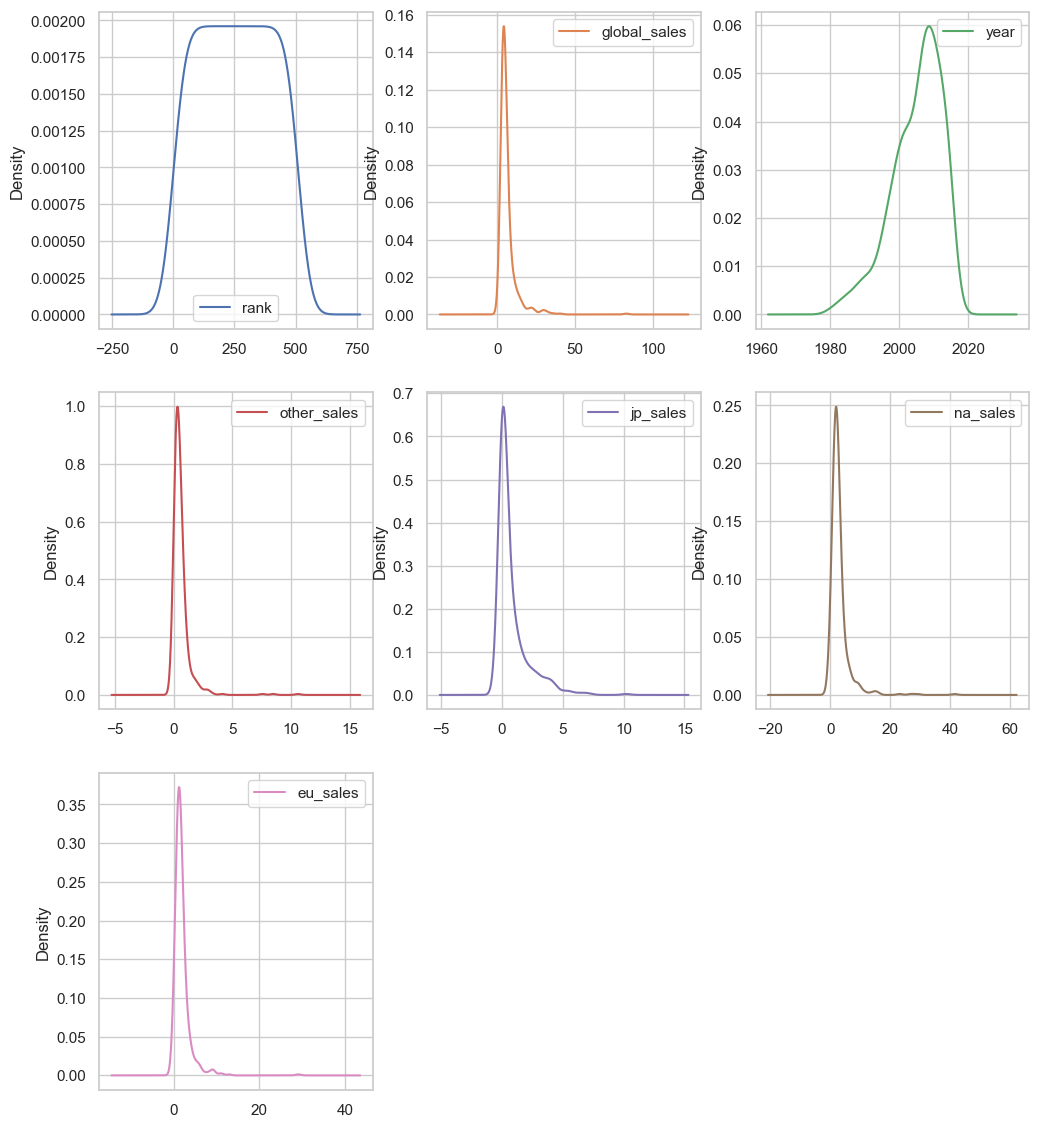

In [29]:
df[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3, 3), figsize=(12,14))

Most features — especially global_sales, na_sales, jp_sales, and other_sales — show strong right-skewed distributions, meaning most values are low, with a long tail of high-performing games,
while the year feature peaks around 2005–2010, indicating most games were released in that period.

**ציר X מייצג את הערך של המשתנה, ו־ציר Y מראה עד כמה נפוץ (צפוף) הערך הזה – ככל שהקו גבוה יותר, כך יותר משחקים נמצאים בטווח הזה.**

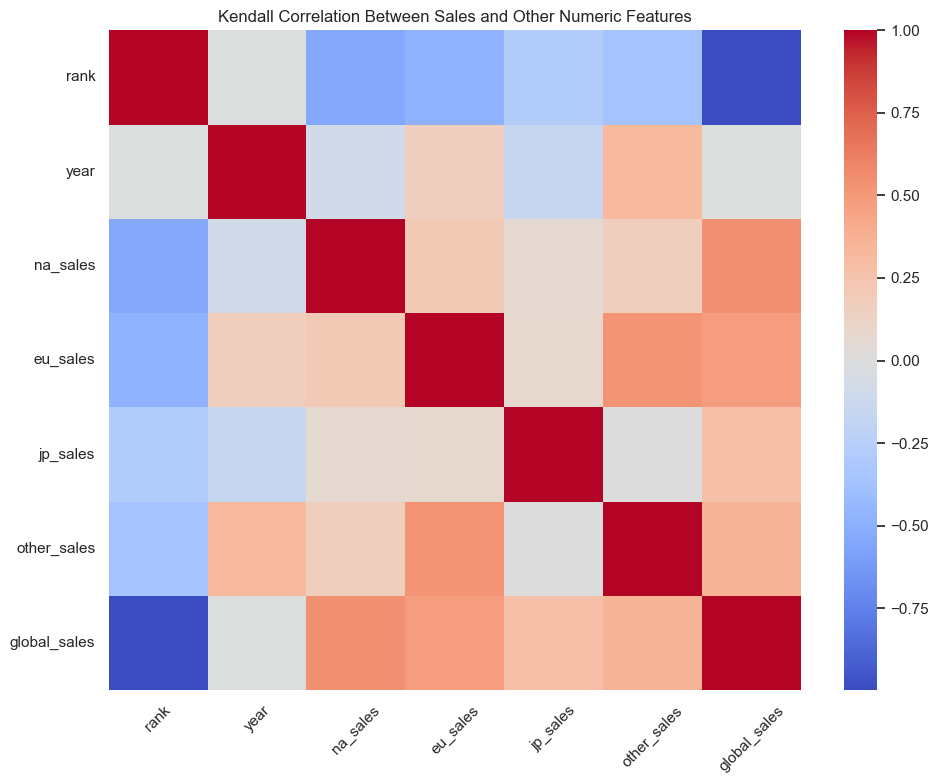

In [138]:

# Select only relevant numeric columns
numeric_cols = ['rank', 'year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
df_corr = df[numeric_cols].dropna()

# Calculate Kendall correlation matrix
corrs = df_corr.corr(method='kendall')

# Plot heatmap without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(
    corrs,
    cmap='coolwarm',
    center=0,
    annot=False  # ← this disables the numbers
)
plt.title("Kendall Correlation Between Sales and Other Numeric Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



The heatmap shows the strength and direction of relationships between numeric features, where red means a strong positive correlation,
blue means a strong negative one,and gray means no correlation.

**מפת החום מציגה כיצד משתנים מספריים קשורים זה לזה – ככל שהצבע אדום יותר, הקשר חיובי חזק יותר, וככל שהוא כחול יותר – הקשר שלילי חזק יותר.**

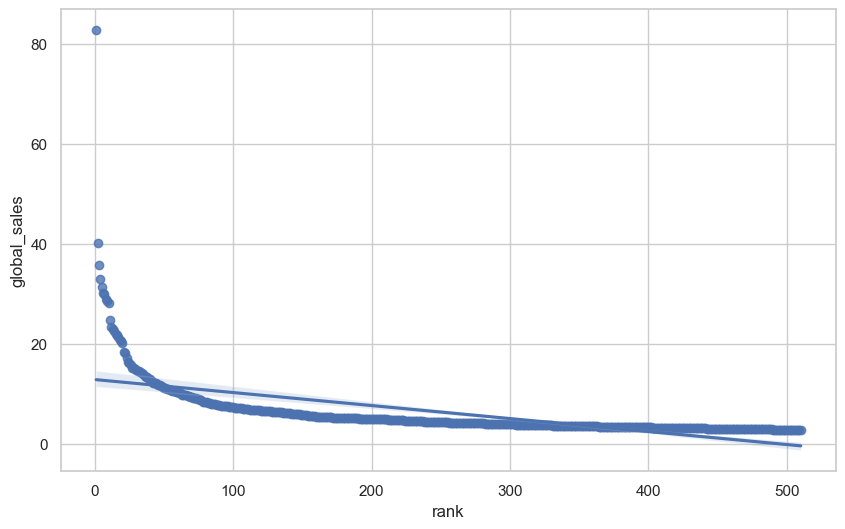

In [30]:
sns.regplot(x='rank', y='global_sales', data=df);

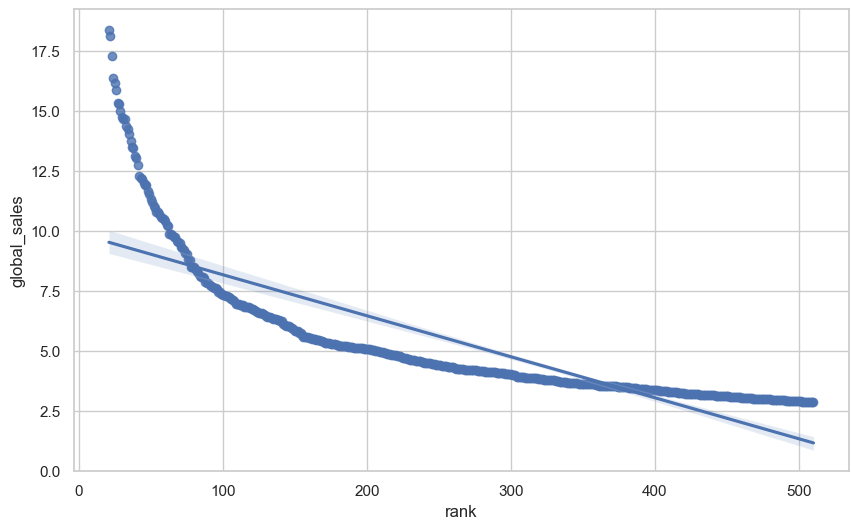

In [31]:
sns.regplot(x='rank', y='global_sales', data=df[df['global_sales'] < 20]);

## 3. Categorical Analysis

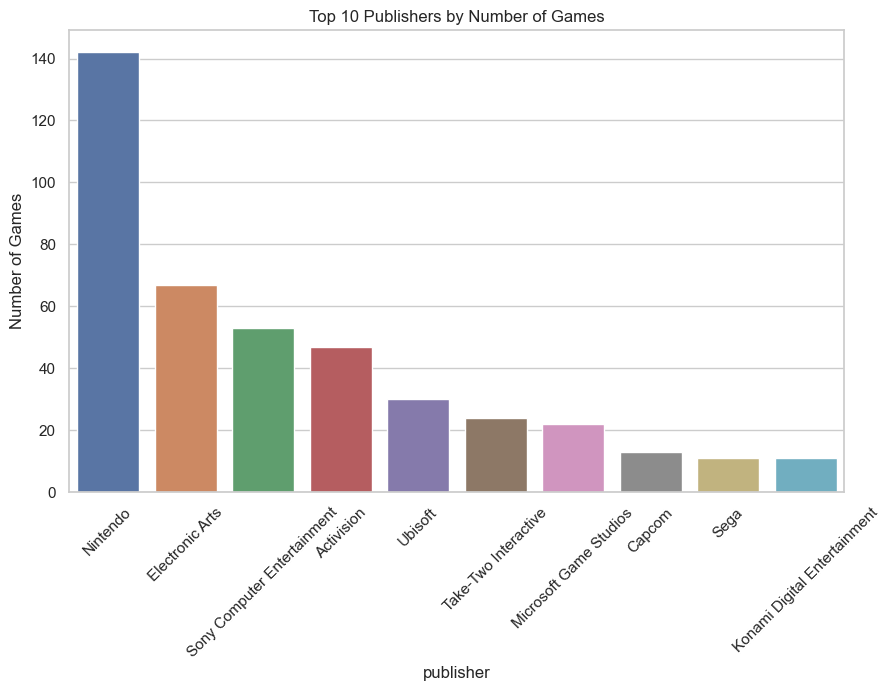

In [24]:
# Top publishers
publisher_counts = df['publisher'].value_counts().nlargest(10)
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Top 10 Publishers by Number of Games')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

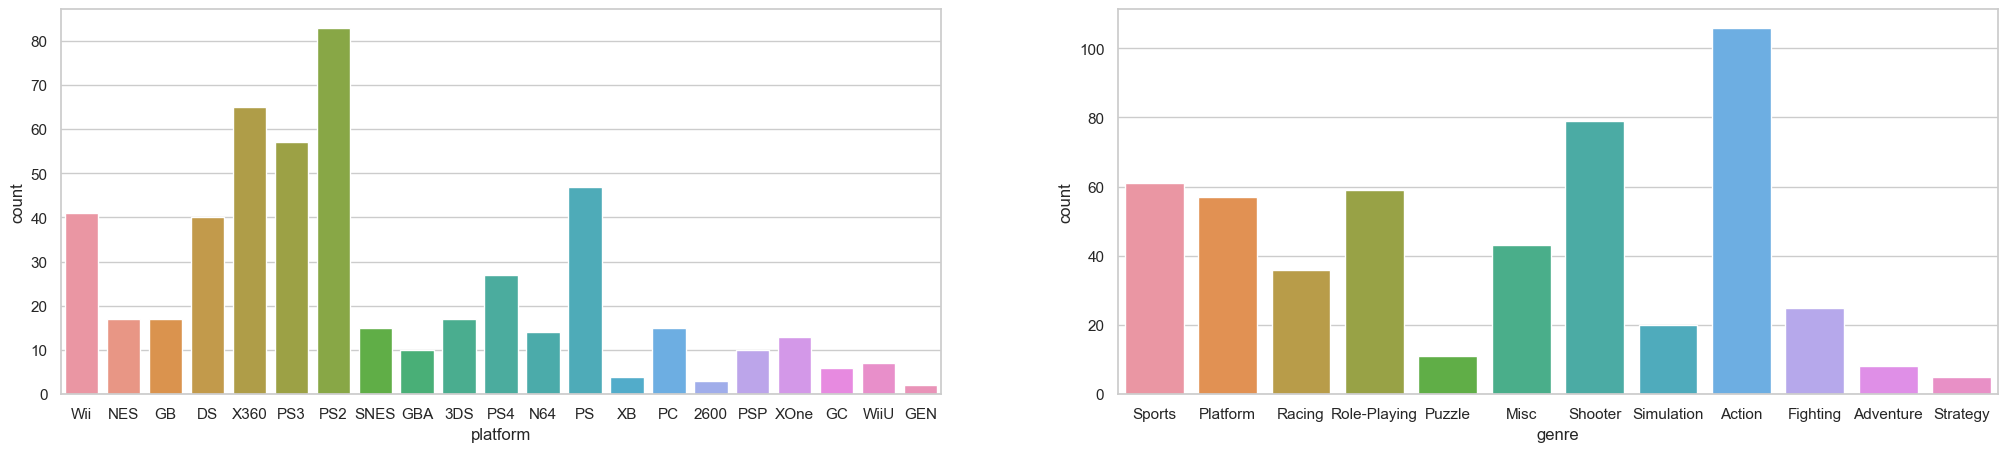

In [65]:
fig, axes = plt.subplots(figsize=(25, 5), ncols=2)
sns.countplot(ax=axes[0], x="platform", data=df)
sns.countplot(ax=axes[1], x="genre", data=df)
plt.show()

In [141]:
df.groupby('genre')[['rank']].count()

,rank
genre,
Action,105
Adventure,8
Fighting,24
Misc,43
Platform,57
Puzzle,11
Racing,36
Role-Playing,59
Shooter,79


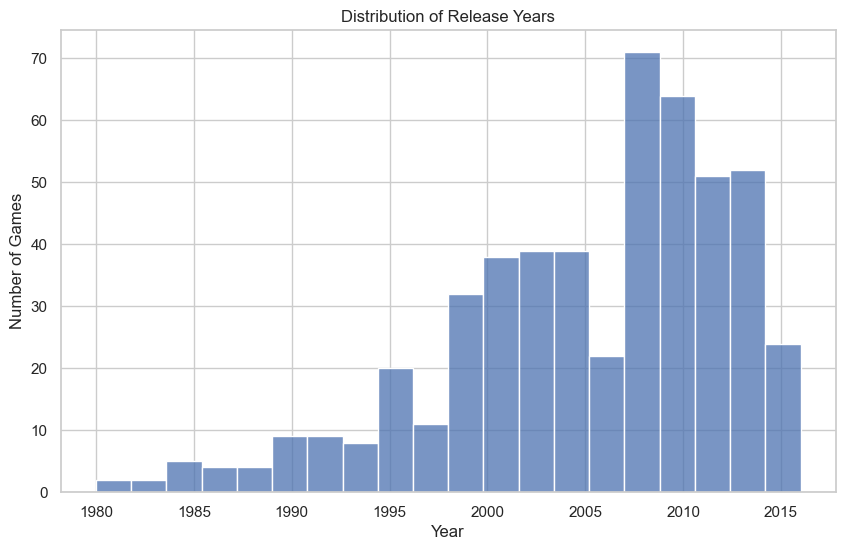

In [83]:
import warnings
warnings.filterwarnings("ignore")
# Year distribution
sns.histplot(df['year'].dropna(), bins=20, kde=False)
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

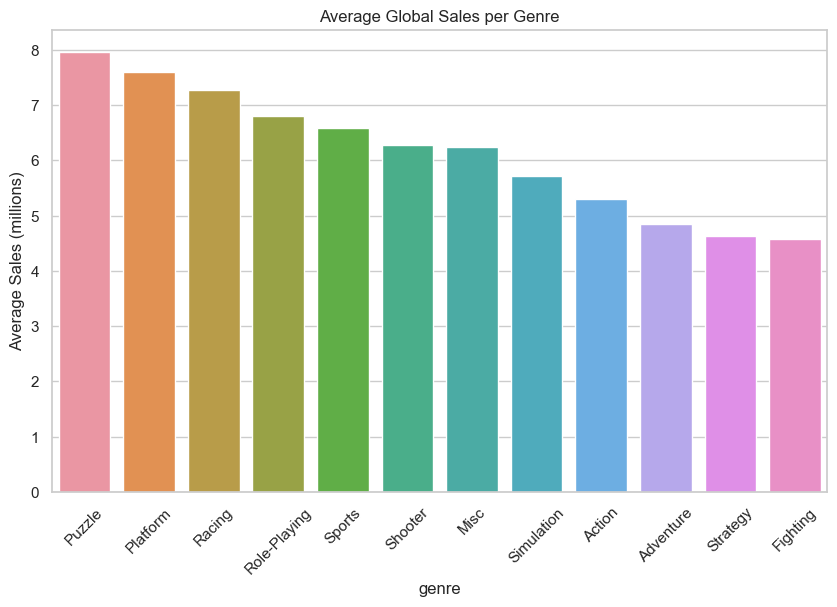

In [32]:
# Average global sales by genre
genre_avg = df.groupby('genre')['global_sales'].mean().sort_values(ascending=False)
sns.barplot(x=genre_avg.index, y=genre_avg.values)
plt.title('Average Global Sales per Genre')
plt.ylabel('Average Sales (millions)')
plt.xticks(rotation=45)
plt.show()

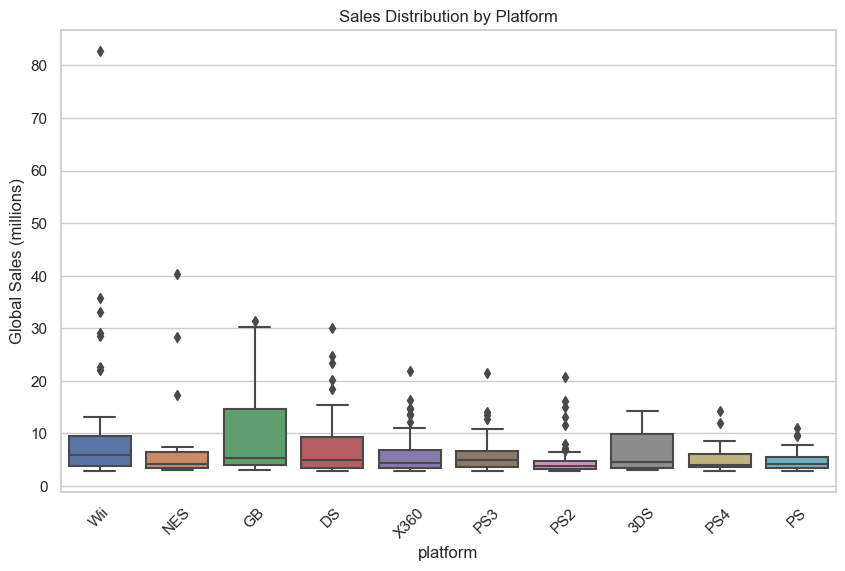

In [88]:

# Boxplot of global sales by top platforms
top_platforms = df['platform'].value_counts().nlargest(10).index
df_top = df[df['platform'].isin(top_platforms)]
sns.boxplot(data=df_top, x='platform', y='global_sales')
plt.title('Sales Distribution by Platform')
plt.xticks(rotation=45)
plt.ylabel('Global Sales (millions)')
plt.show()

**The boxplot shows that most platforms have a low to moderate median sales level, but a few (like GB and Wii) include extreme outliers — games that sold tens of millions of copies, 
highlighting how blockbuster titles can dramatically influence total sales on a platform.



**הגרף מדגיש שפלטפורמות כמו
Wii ו־GameBoy
מכילות כותרים חריגים במיוחד שהובילו את המכירות לגבהים יוצאי דופן, בניגוד לפלטפורמות כמו
PS4
ששם התפלגות המכירות מתונה יותר. זה מחזק את המסקנה שהצלחה של פלטפורמה אינה נובעת רק ממגוון רחב – אלא לפעמים מלהיטים בודדים.**


**Is there a connection between the genre, platform and rank?**

**We can groupby, and then unstack:**

In [148]:
df.groupby(['genre', 'platform'])['rank' ].aggregate('mean').unstack()

platform,2600,3DS,DS,GB,GBA,GC,GEN,N64,NES,PC,...,PS2,PS3,PS4,PSP,SNES,Wii,WiiU,X360,XB,XOne
genre,,,,,,,,,,,,,,,,,,,,,
Action,NaN,343.5,256.000000,319.0,NaN,295.0,NaN,247.000000,260.000000,NaN,...,297.200000,177.944444,301.444444,238.666667,232.0,179.000000,NaN,275.562500,465.0,290.000000
Adventure,NaN,NaN,435.000000,51.0,NaN,NaN,NaN,NaN,252.000000,NaN,...,NaN,361.666667,NaN,NaN,NaN,NaN,NaN,159.000000,NaN,NaN
Fighting,NaN,98.0,NaN,NaN,NaN,108.0,NaN,158.000000,466.000000,NaN,...,400.166667,392.000000,NaN,NaN,282.0,40.000000,204.0,484.000000,NaN,NaN
Misc,NaN,NaN,291.300000,172.0,265.0,NaN,NaN,NaN,NaN,474.0,...,294.800000,169.000000,298.000000,NaN,NaN,206.066667,247.0,188.750000,NaN,NaN
Platform,240.0,59.5,246.750000,227.0,251.0,136.0,199.5,188.333333,40.666667,NaN,...,350.000000,268.500000,NaN,297.000000,165.5,177.833333,292.0,NaN,NaN,NaN
Puzzle,90.0,NaN,226.750000,88.5,489.0,NaN,NaN,NaN,186.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,491.000000,NaN,NaN,NaN,NaN
Racing,NaN,43.0,12.000000,392.0,164.0,111.0,NaN,301.750000,278.000000,NaN,...,161.285714,296.400000,NaN,377.500000,293.5,3.000000,109.0,227.333333,NaN,NaN
Role-Playing,NaN,239.2,128.428571,45.5,72.0,NaN,NaN,NaN,380.000000,280.0,...,163.166667,294.800000,221.000000,267.333333,408.5,NaN,NaN,297.333333,508.0,288.000000
Shooter,259.0,NaN,NaN,NaN,NaN,NaN,NaN,191.000000,10.000000,318.0,...,352.300000,215.333333,225.888889,NaN,473.0,207.000000,236.0,180.478261,105.0,361.777778


## 4. Insights & Conclusions





## 🧪 Research Questions

1. **Which game genres dominate global sales, and what drives their success?**  
   We aim to understand whether sales dominance is due to a wide variety of popular games or driven by a few top-performing titles.

2. **Which geographic region has the strongest influence on global video game sales?**  
   We investigate the correlation between regional sales (NA, EU, JP, Other) and global sales to identify where success matters most.

3. **Are the most successful gaming platforms successful due to overall game diversity or due to a few key franchises?**  
   This question examines whether platform sales are broadly distributed or skewed by blockbuster titles.

---

## 📌 Key Insights and Conclusions

1. 🎮 **Genre Dynamics**: Genres like *Platform* and *Shooter* dominate global sales, not due to quantity of games, but thanks to mega-hits like *Mario* and *Call of Duty*. This reflects a **hit-driven economy** where a few titles shape the entire market.

2. 🌎 **Regional Impact**: The strongest correlation with global success is in **North America** (r = 0.92). In contrast, Japan has weaker influence, showing that games can be locally popular without global reach — and vice versa.

3. 🕹️ **Platform Success Factors**: Platforms like *Wii* and *GameBoy* perform exceptionally well, mainly because of a few standout franchises. This implies platform success often relies more on **iconic titles** than a wide ecosystem of games.
